# 7. projectie

In [1]:
import bluebelt as blue

In [2]:
blue.set_style("fat")
blue.set_figsize_in_pixels(700, 450)
blue.set_language('nl')
blue.set_transparent(False)

In [3]:
series = blue.create.series(1)

---------
  hours
---------

input variables
--------------------------------------------------
  _obj size:                    254
  validation type:              rsq
  validation threshold:         0.0500

pattern
--------------------------------------------------
  shape:                        5
  r squared:                    0.07

residuals
--------------------------------------------------
  bounds level:                 80%
  bounds size:                  155.81
  standard deviation:           60.79
  p-value normal distribution:  0.0172
  outliers:                     11



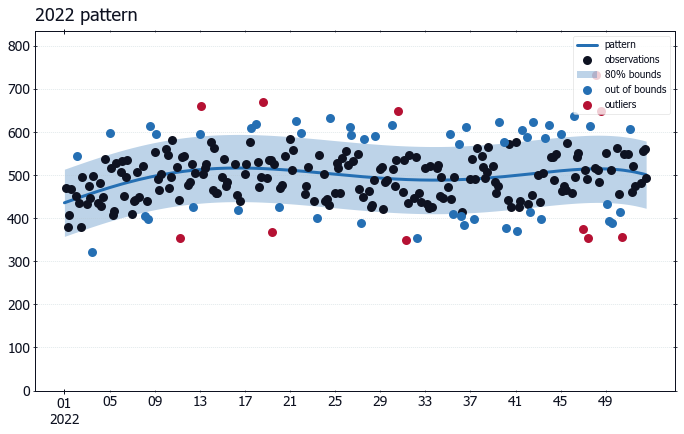

In [4]:
poly = series._.workdays(drop=True)._.pattern.polynomial()
print(poly)
poly.plot(title='2022 pattern', ylim=(0,None))

### jaarpatroon aanpassen

Bijvoorbeeld een salesforecast toepassen.

In [5]:
# eerst het model projecteren op 2025
# standaard wordt rekening gehouden met de vakantiedagen
poly.project(2025)

Polynomial(n=254, shape=5, validation='rsq', threshold=0.05, confidence=0.8, outlier_sigma=2, adjust=True, outliers=11, rsq=0.07, std=60.79, p_value=0.02)

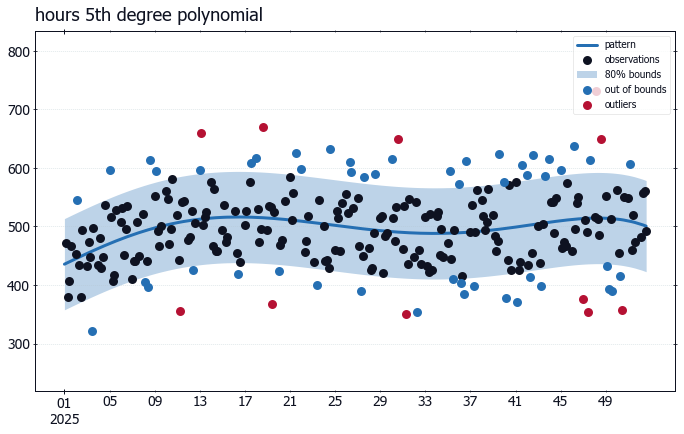

In [6]:
poly.plot()

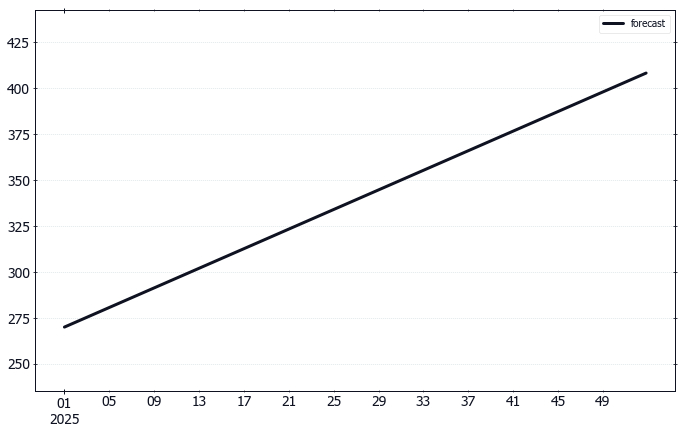

In [7]:
# fictieve forecast maken
forecast = (blue.create.series(1)._.pattern.polynomial(shape=1).pattern - 340) * 4.5
forecast = forecast.rename("forecast")
forecast = forecast._.project(2025, adjust_holidays=False)
forecast._.line()

De forecast op de bestaande polynoom toepassen. De residuals van het bestaande patroon worden bij het nieuwe patroon opgeteld om zo tot nieuwe observaties te komen. Daarna worden opnieuw de bounds en outliers berekend.

In [8]:
poly.set_pattern(forecast)

Polynomial(n=254, shape=-1, validation='rsq', threshold=0.05, confidence=0.8, outlier_sigma=2, adjust=True, outliers=10, rsq=0.30, std=60.79, p_value=0.02)

---------
  hours
---------

input variables
--------------------------------------------------
  _obj size:                    254
  validation type:              rsq
  validation threshold:         0.0500

pattern
--------------------------------------------------
  shape:                        -1
  r squared:                    0.30

residuals
--------------------------------------------------
  bounds level:                 80%
  bounds size:                  155.81
  standard deviation:           60.79
  p-value normal distribution:  0.0172
  outliers:                     10



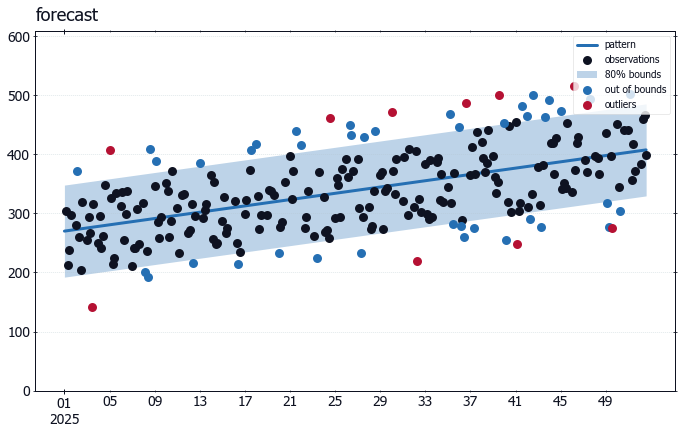

In [9]:
print(poly)
poly.plot(ylim=(0,None))

### weekpatroon toevoegen

In [10]:
poly.add_weekday()

Polynomial(n=254, shape=-1, validation='rsq', threshold=0.05, confidence=0.8, outlier_sigma=2, adjust=True, outliers=11, rsq=0.44, std=54.36, p_value=0.81)

---------
  hours
---------

input variables
--------------------------------------------------
  _obj size:                    254
  validation type:              rsq
  validation threshold:         0.0500

pattern
--------------------------------------------------
  shape:                        -1
  r squared:                    0.44

residuals
--------------------------------------------------
  bounds level:                 80%
  bounds size:                  139.32
  standard deviation:           54.36
  p-value normal distribution:  0.8078
  outliers:                     11



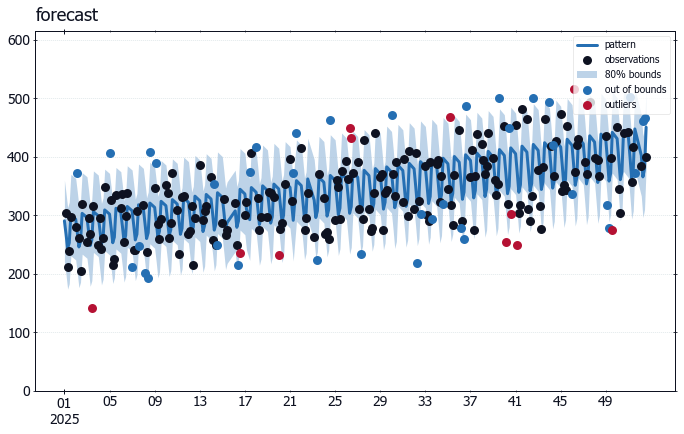

In [11]:
print(poly)
poly.plot(ylim=(0,None))